In [1]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import *

from matplotlib import rc

#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

In [2]:
scale = 1
fontsize_pt = 11*scale # 11.74983
textwidth_pt = 412.56497*scale

# https://gist.github.com/martijnvermaat/b5fe45124049b1e8e037

def configure(document_fontsize=fontsize_pt, available_width=textwidth_pt):
    """
    Configures Matplotlib so saved figures can be used in LaTeX documents.
    Uses the sans-serif TeX Gyre Heros font (Helvetica), also for math.
    Arguments:
    - document_fontsize: Font size in points (use "\the\fontdimen6\font" in
      your LaTeX document to get the current value). The default is for a
      LaTeX Beamer document at 14pt ("\documentclass[14pt]{beamer}") which
      for some reason is slightly more than 14pt.
    - available_width: The available width in your LaTeX document, usually
      the value of "\textwidth". The default is for a LaTeX Beamer document
      with the default theme.
    Returns a function that calculates figure size given a fraction of the
    available width for the figure to occupy.
    Figures can be saved as PDF:
        fig.tight_layout(pad=0.1)
        fig.savefig('figure.pdf')
    And included in your document as follows:
        \begin{frame}
          \begin{center}
            \includegraphics[width=1.0\textwidth,transparent]{figure.pdf}
          \end{center}
        \end{frame}
    Todo:
    - Make font family and face configurable.
    - Example IPython Notebook and LaTeX document.
    - Document dependencies (tex-gyre, dvipng, ...).
    Based on: http://damon-is-a-geek.com/publication-ready-the-first-time-beautiful-reproducible-plots-with-matplotlib.html
    """
    def figsize(width_fraction=1.0):
        """
        width_fraction: The fraction of the available width you'd like the figure to occupy.
        """
        width_pt = available_width * width_fraction

        inches_per_pt = 1.0 / 72.27
        golden_ratio  = (5**0.5 - 1.0) / 2.0

        width_in = width_pt * inches_per_pt
        height_in = width_in * golden_ratio
        return width_in, height_in
    
    from matplotlib import rcParams
    #rcParams['figure.dpi']=160    
    rcParams['font.size'] = document_fontsize
    rcParams['axes.titlesize'] = document_fontsize
    rcParams['axes.labelsize'] = document_fontsize
    rcParams['xtick.labelsize'] = document_fontsize
    rcParams['ytick.labelsize'] = document_fontsize
    rcParams['legend.fontsize'] = document_fontsize
    #rcParams['font.family'] = 'sans-serif'
    #rcParams['font.sans-serif'] = ['tgheros']
    #rcParams['font.serif'] = ['cm10']
    rcParams['text.usetex'] = True
    rcParams['text.latex.preamble'] = r"""
        \usepackage[T1]{fontenc}
        \usepackage{amsmath}
        \usepackage{amsfonts}
        \usepackage{amssymb}
        """
    rcParams['figure.figsize'] = figsize()

    return figsize
figsize = configure()

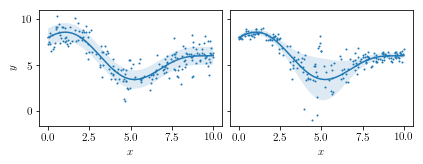

In [3]:
x = np.linspace(0, 10, num=200)
f = lambda x: sin(x)+2*cos(x/2)+6
e = lambda x: 2*exp(-(x-5)**2/3)+0.3
y = np.array([f(x) for x in x])
ye = np.array([e(x) for x in x])

x_samples = np.random.rand(200)*10
y_samples = np.array([f(x) for x in x_samples])
ye_heterosced_samples = np.array([f(x)+np.random.randn()*e(x) for x in x_samples])
ye_homosced_samples = np.array([f(x)+np.random.randn() for x in x_samples])

w, h = figsize()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(w,h*0.6))

ax1.fill_between(x, y-1, y+1, facecolor='#1f77b4', alpha=0.15, lw=0, interpolate=False)
ax1.plot(x, y, color='#1f77b4')
ax1.scatter(x_samples, ye_homosced_samples, s=1)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.fill_between(x, y-ye, y+ye, facecolor='#1f77b4', alpha=0.15, lw=0, interpolate=False)
ax2.plot(x, y, color='#1f77b4')
ax2.scatter(x_samples, ye_heterosced_samples, s=1)
ax2.set_xlabel('$x$')

fig.tight_layout(pad=0.1)

# \includegraphics[width=1.0\textwidth,transpaent]{figure.pdf}

In [4]:
fig.savefig('homoscedastic-heteroscedastic-noises.pdf')

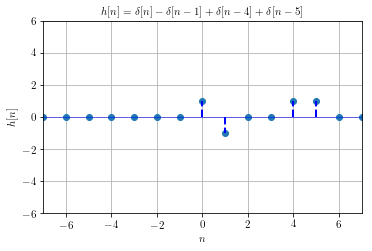

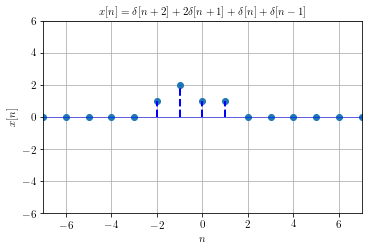

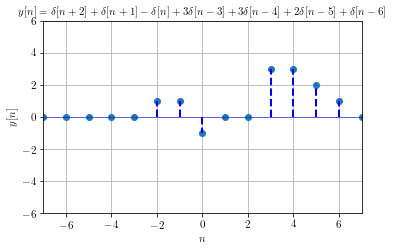

In [5]:
#Defining the delta function
def delta(n):
    if n == 0:
        return 1
    else:
        return 0

#fining lists

h_ = []
x_ = []
y_ = []
n = 7

#Writing the h[n] function in terms of delta function
for i in range(-n,n+1):
    h = delta(i) - delta(i-1) + delta(i-4) + delta(i-5)
    h_.append(h)

#Writing the x[n] function in terms of delta function
for i in range(-n,n+1):
    x = delta(i-1) + delta(i) + 2*delta(i+1) + delta(i+2)
    x_.append(x)

#Linearly Convolving the two functions
y_ = np.convolve(x_,h_,mode='full')

#Plotting the h[n] function
plt.figure(1)
markerline, stemlines, baseline = plt.stem(range(-n,n+1),h_, '--')
plt.setp(stemlines, 'color', 'b', 'linewidth', 2)
plt.setp(baseline, 'color', 'b', 'linewidth', 0.5)
plt.ylim([-6,6])
plt.xlim([-n,n])
plt.xlabel('$n$')
plt.ylabel('$h[n]$')
plt.title('$h[n] = \delta [n] - \delta [n-1] + \delta [n-4] + \delta [n-5] $')
plt.grid(True)

#Plotting the x[n] function
plt.figure(2)
markerline, stemlines, baseline = plt.stem(range(-n,n+1),x_, '--')
plt.setp(stemlines, 'color', 'b', 'linewidth', 2)
plt.setp(baseline, 'color', 'b', 'linewidth', 0.5)
plt.ylim([-6,6])
plt.xlim([-n,n])
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.title('$x[n] = \delta [n+2] + 2\delta [n+1] + \delta [n] + \delta [n-1]$')
plt.grid(True)

#Plotting the y[n] function
plt.figure(3)
markerline, stemlines, baseline = plt.stem(range(-2*n,2*n+1),y_, '--')
plt.setp(stemlines, 'color', 'b', 'linewidth', 2)
plt.setp(baseline, 'color', 'b', 'linewidth', 0.5)
plt.ylim([-6,6])
plt.xlim([-n,n])
plt.xlabel('$n$')
plt.ylabel('$y[n]$')
plt.title('$y[n] = \delta [n+2] + \delta [n+1] -\delta [n] + 3\delta [n-3] + 3\delta [n-4] + 2\delta [n-5] + \delta [n-6] $')
plt.grid(True)

plt.show()